In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semantic-segmentation-drone-dataset/colormaps.xlsx
/kaggle/input/semantic-segmentation-drone-dataset/classes_dict.txt
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/173.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/491.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/043.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/248.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/038.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/480.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/236.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/la

In [2]:
#here we check all the files in  a particular folder 
import os

folder_path = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic"
folder_path1 = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/original_images"
# List all files and directories
all_files = os.listdir(folder_path)
all_files1 = os.listdir(folder_path1)

for i in range(len(all_files)):
    all_files[i] = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/" + all_files[i]
    all_files1[i] = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/original_images/" + all_files1[i]
    
print(all_files[0])
print(len(all_files1))




/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/173.png
400


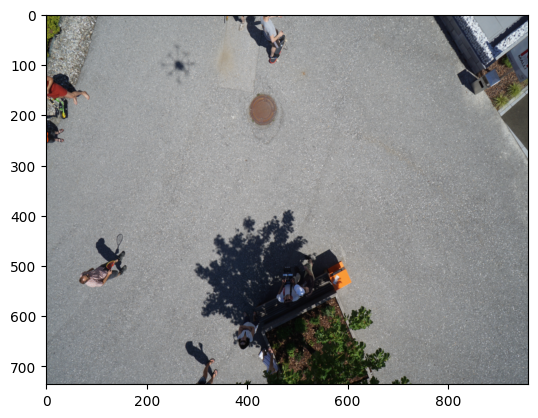

In [3]:
import cv2
import matplotlib.pyplot as plt
# Load the image
image_path = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/original_images/000.png"
image = plt.imread(image_path)


# Display the image (optional)
plt.imshow(image)



In [4]:
#now lets get the image associated with the image path 
def get_image(files_list):
    final_list = []
    for i in range(len(files_list)):
        image_path = files_list[i]
        image = plt.imread(image_path)
        final_list.append(image)
    return final_list
        
        
    

In [5]:
#now lets prepare the data 
import numpy as np
original_list = get_image(all_files1)
semantic_list = get_image(all_files)

#now we have got the image list , lets typecast them into numpy array 
original_array = np.asarray(original_list)
semantic_array  = np.asarray(semantic_list)


print(semantic_array[0].shape)

(736, 960, 4)


In [6]:
reduced_semantic_array = []
for i in range(len(semantic_array)):
   k = semantic_array[i][:,:,:3]
   reduced_semantic_array.append(k)

reduced_semantic_array = np.asarray(reduced_semantic_array)

print(reduced_semantic_array[1].shape)

(736, 960, 3)


In [7]:
#we denormalize the semantic m
#here we can see that the array is normalized in order to denormalize we multiply by 255.0
denormalized_semantic_image = np.asarray([(reduced_semantic_array[i]*255).astype("uint8") for i in range(len(original_array))])

print(denormalized_semantic_image[0].shape)

(736, 960, 3)


In [8]:
print(denormalized_semantic_image[1])

[[[155  38 182]
  [155  38 182]
  [155  38 182]
  ...
  [124 252   0]
  [124 252   0]
  [124 252   0]]

 [[155  38 182]
  [169 169 169]
  [169 169 169]
  ...
  [124 252   0]
  [124 252   0]
  [124 252   0]]

 [[155  38 182]
  [169 169 169]
  [169 169 169]
  ...
  [124 252   0]
  [124 252   0]
  [124 252   0]]

 ...

 [[155  38 182]
  [169 169 169]
  [169 169 169]
  ...
  [169 169 169]
  [169 169 169]
  [155  38 182]]

 [[155  38 182]
  [169 169 169]
  [169 169 169]
  ...
  [169 169 169]
  [169 169 169]
  [155  38 182]]

 [[155  38 182]
  [155  38 182]
  [155  38 182]
  ...
  [155  38 182]
  [155  38 182]
  [155  38 182]]]


In [9]:
l = denormalized_semantic_image[0]
m = list(l[1,2])
print(m)

[169, 169, 169]


In [10]:
#now what i need to do is using the denormalized image , i would like to convert them into the classes 
import numpy as np

def convert_classes_one_hot(denormalized_class):
    class_list = []
    # Define the updated RGB to class mapping
    COLOR_TO_CLASS = {
        (0, 0, 0): 0,         # unlabeled
        (155, 38, 182): 1,    # obstacles
        (128, 64, 128): 2,    # paved-area
        (14, 135, 204): 3,    # water
        (130, 76, 0): 4,      # dirt
        (124, 252, 0): 5,     # soft-surfaces
        (0, 102, 0): 6,       # grass
        (255, 20, 147): 7,    # moving-objects
        (112, 103, 87): 8,    # gravel
        (169, 169, 169): 9,   # landing-zones
        (28, 42, 168): 10,    # water (duplicate)
        (48, 41, 30): 11,     # rocks
        (0, 50, 89): 12,      # pool
        (107, 142, 35): 13,   # vegetation
        (70, 70, 70): 14,     # roof
        (102, 102, 156): 15,  # wall
        (254, 228, 12): 16,   # window
        (254, 148, 12): 17,   # door
        (190, 153, 153): 18,  # fence
        (153, 153, 153): 19,  # fence-pole
        (255, 22, 96): 20,    # person
        (102, 51, 0): 21,     # dog
        (9, 143, 150): 22,    # car
        (119, 11, 32): 23,    # bicycle
        (51, 51, 0): 24,      # tree
        (190, 250, 190): 25,  # bald-tree
        (112, 150, 146): 26,  # ar-marker
        (2, 135, 115): 27,    # obstacle
        (255, 0, 0): 28       # conflicting
    }

    num_classes = len(COLOR_TO_CLASS)

    for k in range(150):
        # Create an empty one-hot encoded array (736, 960, 29)
        class_mask_one_hot = np.zeros((736, 960, num_classes), dtype=np.uint8)
        print(k)
        for i in range(736):
            for j in range(960):
                l = tuple(denormalized_class[k][i, j])  # Convert to tuple for dict lookup
                if l in COLOR_TO_CLASS:
                    class_index = COLOR_TO_CLASS[l]
                    class_mask_one_hot[i, j, class_index] = 1  # Set one-hot vector at the class index
        
        class_list.append(class_mask_one_hot)

    return class_list


# Example usage
class_list = convert_classes_one_hot(denormalized_semantic_image)
class_list = np.asarray(class_list)
print("Number of images processed:", len(class_list))
print("Shape of one-hot encoded array:", class_list[0].shape)  # Should be (736, 960, 29)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
Number of images processed: 150
Shape of one-hot encoded array: (736, 960, 29)


In [11]:
 print(original_array[1])

[[[0.4862745  0.49411765 0.49411765]
  [0.4862745  0.48235294 0.49411765]
  [0.4862745  0.49411765 0.49803922]
  ...
  [0.2        0.18039216 0.14117648]
  [0.1882353  0.16862746 0.13725491]
  [0.20784314 0.19215687 0.16470589]]

 [[0.47843137 0.48235294 0.4862745 ]
  [0.49019608 0.49803922 0.49411765]
  [0.5019608  0.5137255  0.50980395]
  ...
  [0.21960784 0.19215687 0.16078432]
  [0.19607843 0.1764706  0.14901961]
  [0.1882353  0.17254902 0.15686275]]

 [[0.4745098  0.4745098  0.48235294]
  [0.4862745  0.49019608 0.49019608]
  [0.49803922 0.5137255  0.5019608 ]
  ...
  [0.19607843 0.1764706  0.15294118]
  [0.18431373 0.16470589 0.14117648]
  [0.16078432 0.14901961 0.14509805]]

 ...

 [[0.28627452 0.29411766 0.34117648]
  [0.31764707 0.32156864 0.34901962]
  [0.29411766 0.29803923 0.34117648]
  ...
  [0.30588236 0.24313726 0.21176471]
  [0.29411766 0.23921569 0.20392157]
  [0.28627452 0.23137255 0.2       ]]

 [[0.28235295 0.28627452 0.34117648]
  [0.28627452 0.30980393 0.34901962]


In [12]:
#here we can see that the array is normalized in order to denormalize we multiply by 255.0
denormalized_original_image = np.asarray([(original_array[i]*255).astype("uint8") for i in range(len(original_array))])

print(len(denormalized_original_image))

400


In [13]:
print(denormalized_original_image[1])

[[[124 126 126]
  [124 123 126]
  [124 126 127]
  ...
  [ 51  46  36]
  [ 48  43  35]
  [ 53  49  42]]

 [[122 123 124]
  [125 127 126]
  [128 131 130]
  ...
  [ 56  49  41]
  [ 50  45  38]
  [ 48  44  40]]

 [[121 121 123]
  [124 125 125]
  [127 131 128]
  ...
  [ 50  45  39]
  [ 47  42  36]
  [ 41  38  37]]

 ...

 [[ 73  75  87]
  [ 81  82  89]
  [ 75  76  87]
  ...
  [ 78  62  54]
  [ 75  61  52]
  [ 73  59  51]]

 [[ 72  73  87]
  [ 73  79  89]
  [ 67  71  83]
  ...
  [ 70  59  50]
  [ 67  56  47]
  [ 66  56  49]]

 [[ 73  74  86]
  [ 73  78  87]
  [ 67  73  83]
  ...
  [ 65  55  49]
  [ 66  57  49]
  [ 65  58  49]]]


In [14]:
#now we have denormalized the image . 
#next we now try to build the unet model , infused with attention 
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, UpSampling2D, GlobalAveragePooling2D, AveragePooling2D, 
    Dense, Concatenate, Input, Multiply
)
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model

class TeacherNetwork:
    def __init__(self, weight, reduction_amount):
        self.activation = "relu"
        self.padding = "same"
        self.kernel_size = (3, 3)
        self.weight = weight  # Importance given to avg pooling
        self.reduction_amount = reduction_amount

    def encoder_layer(self, filters, last_layer):
        output1 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(last_layer)
        output2 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(output1)
        batchnorm4 = BatchNormalization()(output2)
        maxpool_layer = MaxPooling2D()(batchnorm4)
        return output2, maxpool_layer

    def decoder_layer(self, filters, last_layer):
        output1 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(last_layer)
        batchnorm3= BatchNormalization()(output1)
        output2 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(batchnorm3)
        upsample_layer = UpSampling2D(size=(2,2), interpolation="nearest")(output2)
        return upsample_layer

    def channel_attention_layer(self, input_tensor, filters):
        pooled_tensor = MaxPooling2D()(input_tensor)
        avg_pool = GlobalAveragePooling2D()(pooled_tensor)

        
        avg_pool1= AveragePooling2D((2,2))(input_tensor)

        avg_pool2 = GlobalAveragePooling2D()(avg_pool1)


        dense_layer = Dense(filters, activation="relu")(avg_pool)
        dense_layer1 = Dense(filters // 2, activation="relu")(dense_layer)
        dense_layer2 = Dense(filters, activation="relu")(dense_layer1)


        dense_layer3 = Dense(filters, activation="relu")(avg_pool2)
        dense_layer4 = Dense(filters // 2, activation="relu")(dense_layer3)
        dense_layer5 = Dense(filters, activation="relu")(dense_layer4)

        #now i concatenate the output of the two 
        concatenate_layer = Concatenate(axis = -1)([dense_layer2,dense_layer5])

        dense_layer6 = Dense(filters, activation = "sigmoid")(concatenate_layer)

        dense_layer7 = tf.keras.layers.Reshape((1, 1, filters))(dense_layer6)
        
        output_filters = Multiply()([input_tensor, dense_layer7])
        return output_filters

    def spatial_attention_layer(self, input_tensor, filters):
        input_tensor1 = self.channel_attention_layer(input_tensor, filters)

        maxpool_tensor = MaxPooling2D((2, 2))(input_tensor1)
        average_tensor = AveragePooling2D((2, 2))(input_tensor1)

        # Adjust importance
        average_tensor = self.weight * average_tensor
        maxpool_tensor = (1 - self.weight) * maxpool_tensor

        concatenated_filters = Concatenate(axis=-1)([average_tensor, maxpool_tensor])
        convolution_filter = Conv2D(filters, (3,3), padding="same", activation="relu")(concatenated_filters)
        batchnorm5 = BatchNormalization()(convolution_filter)
        convolution_filter2 = Conv2D(1, (3,3), padding="same", activation="sigmoid")(batchnorm5)
        batchnorm6 = BatchNormalization()(convolution_filter2)

        upsampled_filter = UpSampling2D((2,2))(batchnorm6)
        
        spatial_filter = Multiply()([input_tensor1, upsampled_filter])
        return spatial_filter

    def attention_block(self, input_tensor, filters):
        return self.spatial_attention_layer(input_tensor, filters)

    def build_model(self, input_shape):
        inputs = Input(shape=input_shape)
        
        enc1, pool1 = self.encoder_layer(16, inputs)
        enc2, pool2 = self.encoder_layer(32, pool1)
        enc3, pool3 = self.encoder_layer(32, pool2)
        enc4, _ = self.encoder_layer(64, pool3)

        att1 = self.attention_block(enc1, 16)
        att2 = self.attention_block(enc2, 32)
        att3 = self.attention_block(enc3, 32)

        dec6 = self.decoder_layer(64, enc4)
        concat5 = Concatenate(axis=-1)([att3, dec6])
        dec5 = self.decoder_layer(32, concat5)

        concat4 = Concatenate(axis=-1)([att2, dec5])
        dec4 = self.decoder_layer(32, concat4)

        concat3 = Concatenate(axis=-1)([att1, dec4])
        dec3 = self.decoder_layer(16, concat3)

        maxpool_layer = MaxPooling2D()(dec3)

        concat1 = Concatenate(axis=-1)([att1, maxpool_layer])
        batchnorm11 = BatchNormalization()(concat1)
        output_tensor1 = Conv2D(32, (3, 3), activation=self.activation, padding=self.padding)(batchnorm11)
        batchnorm12 = BatchNormalization()(output_tensor1)
        output_tensor2 = Conv2D(29, (1, 1), activation="softmax", padding=self.padding)(batchnorm12)
        return Model(inputs, [output_tensor2,output_tensor2])

In [15]:
#after creating the class , lets now create an object 
teacher_unet = TeacherNetwork(0.5,2)
teacher_model = teacher_unet.build_model((736,960,3))
teacher_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 736, 960, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 736, 960, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 736, 960, 16)   │          2,320 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 736, 960, 16)   │             64 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 368, 480, 16)   │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 368, 480, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 368, 480, 32)   │          9,248 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 368, 480, 32)   │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 184, 240, 32)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 184, 240, 32)   │          9,248 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 184, 240, 32)   │          9,248 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 92, 120, 32)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_pooling2d_4       │ (None, 92, 120, 32)    │              0 │ conv2d_5[0][0]         │
│ (AveragePooling2D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ max_pooling2d_8[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ average_pooling2d_4[0… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)     

 Total params: 306,588 (1.17 MB)

 Trainable params: 305,846 (1.17 MB)

 Non-trainable params: 742 (2.90 KB)

In [16]:
import tensorflow as tf
import keras.backend as K

def modified_iou_score(y_true, y_pred):
    # Cast tensors to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Flatten tensors to handle pixel-wise operations
    y_true_flat = tf.reshape(y_true, [-1, 29])  # Flatten to (736 * 960, 29)
    y_pred_flat = tf.reshape(y_pred, [-1, 29])

    # Calculate intersection (element-wise multiplication and sum)
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat, axis=0)  # Sum over all pixels

    # Calculate union (sum of both - intersection)
    union = tf.reduce_sum(y_true_flat, axis=0) + tf.reduce_sum(y_pred_flat, axis=0) - intersection

    # IoU calculation: intersection / union (with epsilon to avoid division by zero)
    iou = intersection / (union + tf.keras.backend.epsilon())

    # Return mean IoU across all classes
    return 10000*tf.reduce_mean(iou)





def iou_loss(y_true, y_pred, smooth=1e-6):
    return 10000- modified_iou_score(y_true,y_pred)
    
    


In [17]:
def modified_dice_score(y_true, y_pred, smooth=1e-6):
    """
    Dice Loss for semantic segmentation.

    Args:
        y_true: Ground truth labels, shape (batch_size, height, width, channels).
        y_pred: Predicted labels, shape (batch_size, height, width, channels).
        smooth: Smoothing factor to avoid division by zero.

    Returns:
        Dice loss value.
    """
    y_true = tf.cast(y_true,tf.float32)
    y_pred = tf.cast(y_pred,tf.float32)
    
    # Flatten the predictions and labels
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    
    # Compute intersection and union
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred)
    
    # Dice coefficient
    dice = (2. * intersection + smooth) / (union + smooth)
    return 10000*dice


def dice_loss(y_true, y_pred, smooth=1e-6):
    """
    Dice Loss for semantic segmentation.

    Args:
        y_true: Ground truth labels, shape (batch_size, height, width, channels).
        y_pred: Predicted labels, shape (batch_size, height, width, channels).
        smooth: Smoothing factor to avoid division by zero.

    Returns:
        Dice loss value.
    """
   
    return 10000 - modified_dice_score(y_true, y_pred, smooth)

    


In [18]:
#now we will try to train the attention infused unet model with the data 
#for this we will try to use the iou and the dice score as the metrics
from keras.optimizers import Adam 

teacher_model.compile(metrics = [modified_iou_score,modified_dice_score],optimizer= Adam(learning_rate = 0.001),loss =[iou_loss,dice_loss])

In [19]:
#now lets partition the data 
first_training = denormalized_original_image[:80]
first_training_semantic = class_list[:80]

second_training = denormalized_original_image[80:130]
second_training_semantic = class_list[80:130]

validation_set_original = denormalized_original_image[130:150]
validation_set_semantic = class_list[130:150]




In [20]:
#now lets fit the model 
history = teacher_model.fit(first_training,first_training_semantic,validation_data = (validation_set_original,validation_set_semantic),verbose = 1  , batch_size = 5 , epochs = 500)


Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - conv2d_23_modified_iou_score: 72.8606 - loss: 9927.1396 - val_conv2d_23_modified_iou_score: 56.4636 - val_loss: 9943.5361
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 699ms/step - conv2d_23_modified_iou_score: 274.1714 - loss: 9725.8291 - val_conv2d_23_modified_iou_score: 152.6080 - val_loss: 9847.3926
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 707ms/step - conv2d_23_modified_iou_score: 394.6318 - loss: 9605.3682 - val_conv2d_23_modified_iou_score: 200.1559 - val_loss: 9799.8438
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 713ms/step - conv2d_23_modified_iou_score: 429.4821 - loss: 9570.5186 - val_conv2d_23_modified_iou_score: 37.0923 - val_loss: 9962.9082
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 719ms/step - conv2d_23_modified_iou_score: 455.7879 - loss: 9544.2119 - val_conv2d_23_modified_iou_score: 165.9491 - val_loss: 9834.0508
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 726ms/step - conv2d_23_modified_iou_score: 473.0917 - loss: 95

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(736, 960, 29)


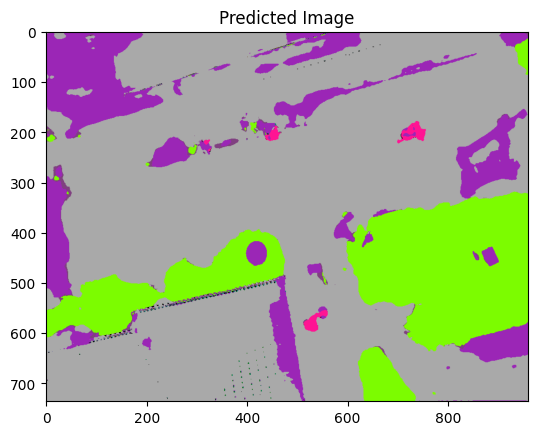

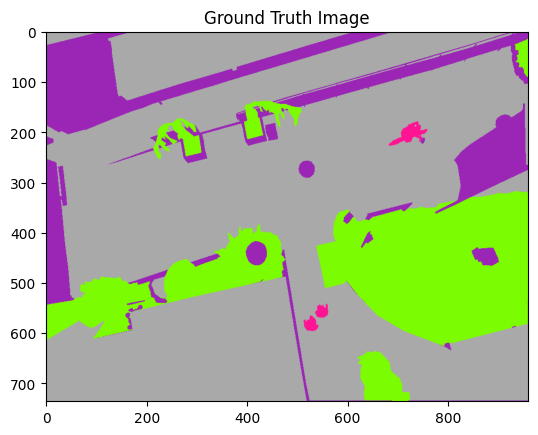

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(736, 960, 29)


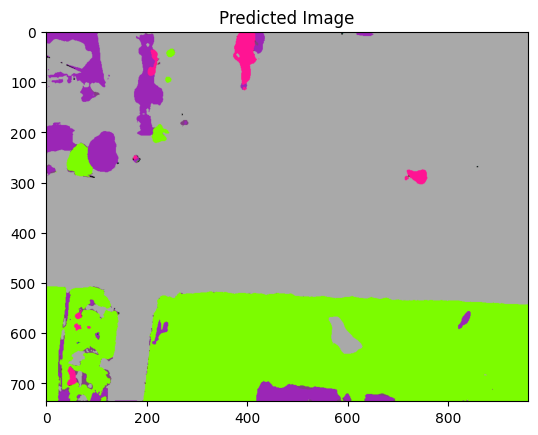

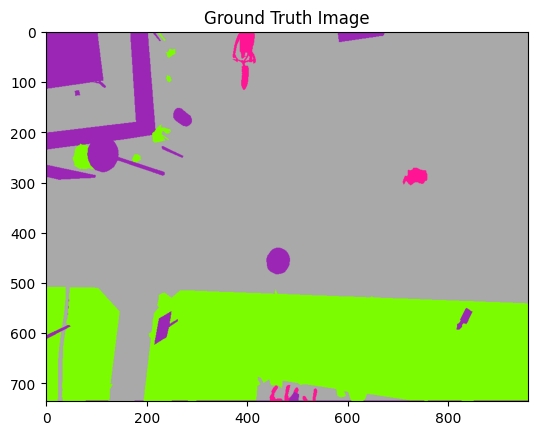

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(736, 960, 29)


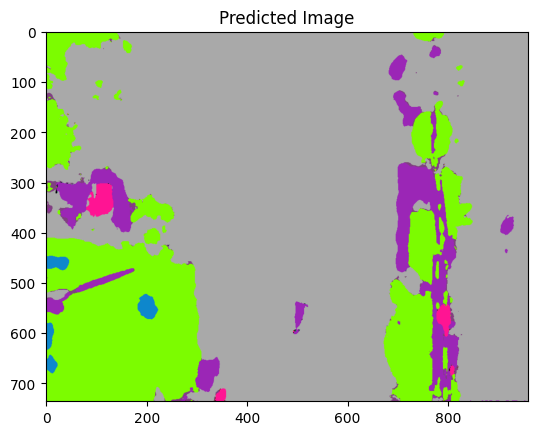

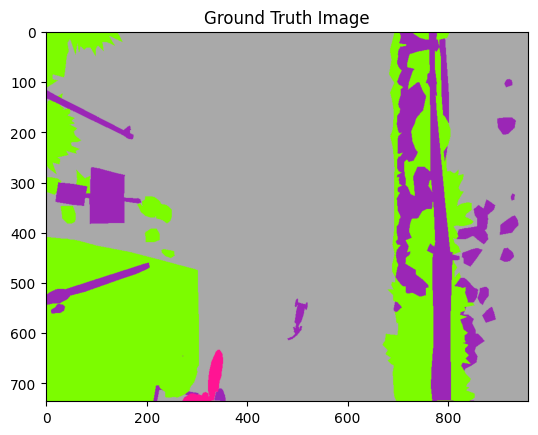

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(736, 960, 29)


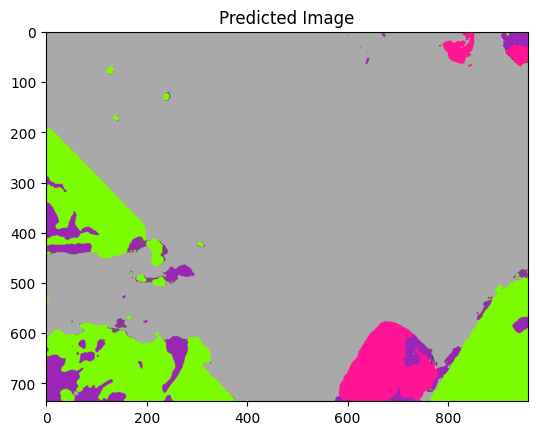

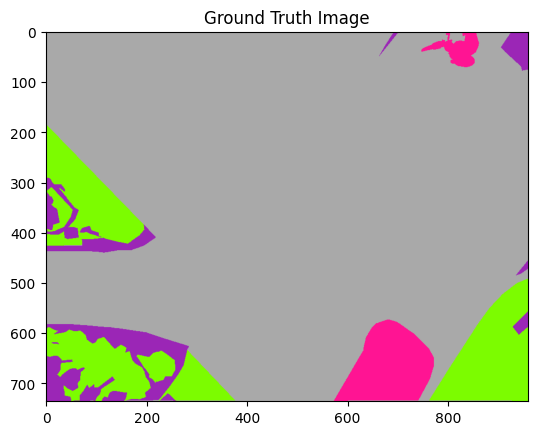

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(736, 960, 29)


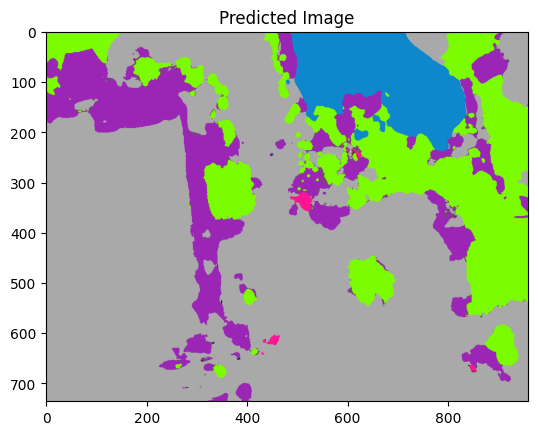

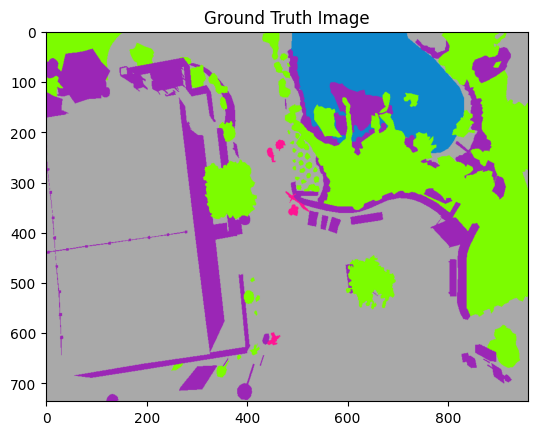

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(736, 960, 29)


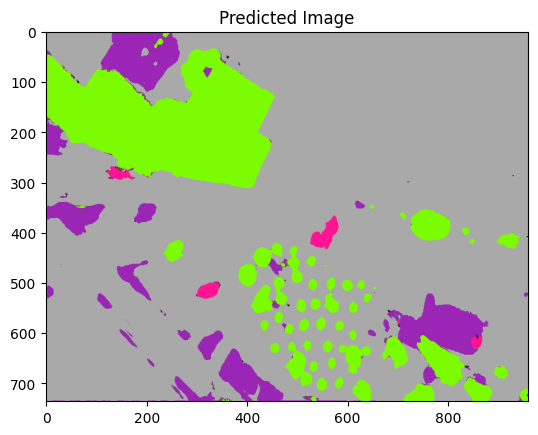

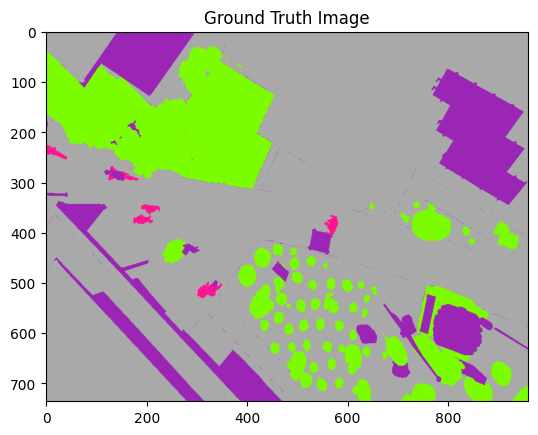

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(736, 960, 29)


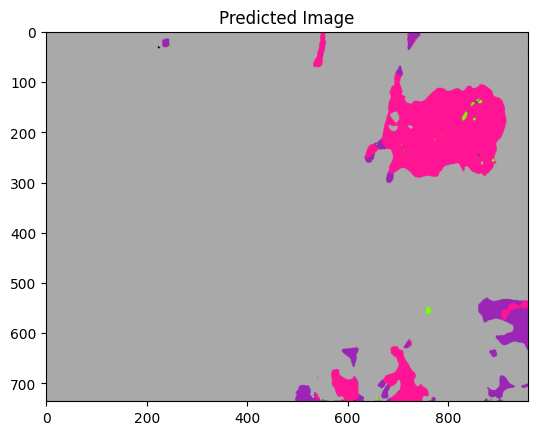

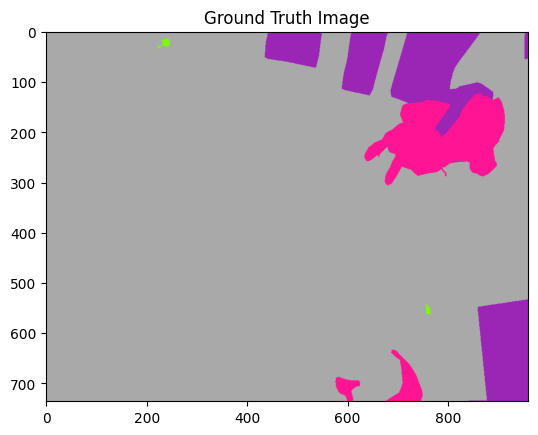

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(736, 960, 29)


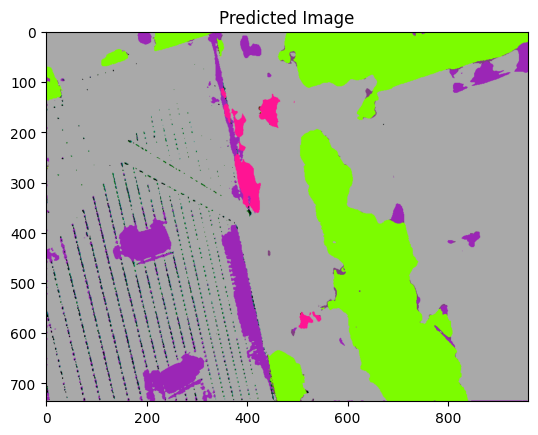

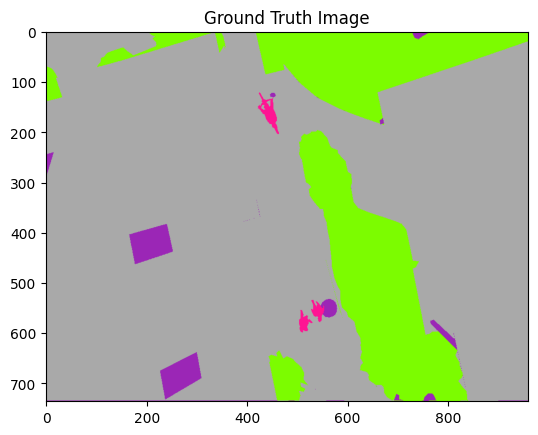

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(736, 960, 29)


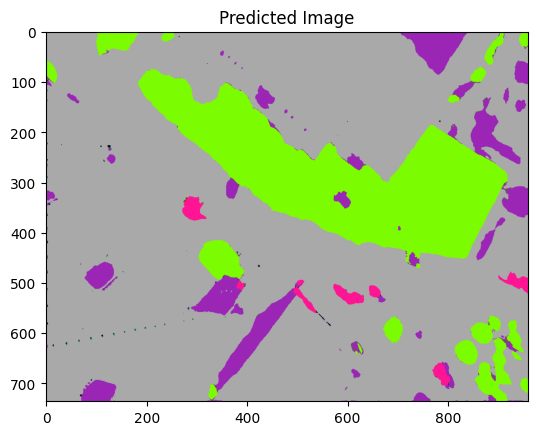

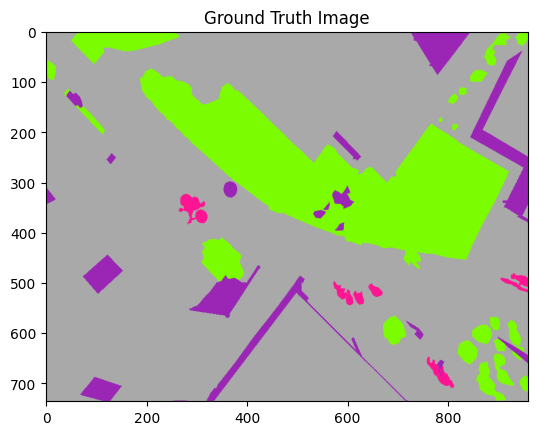

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(736, 960, 29)


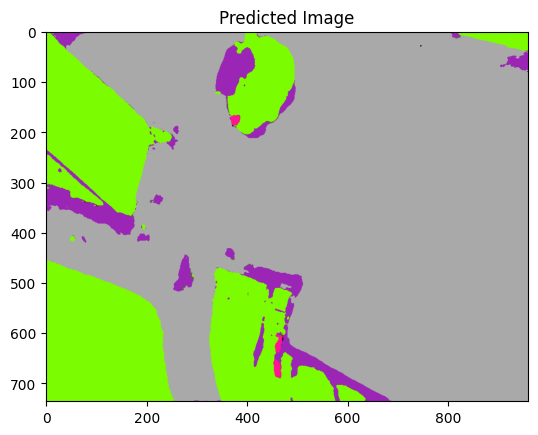

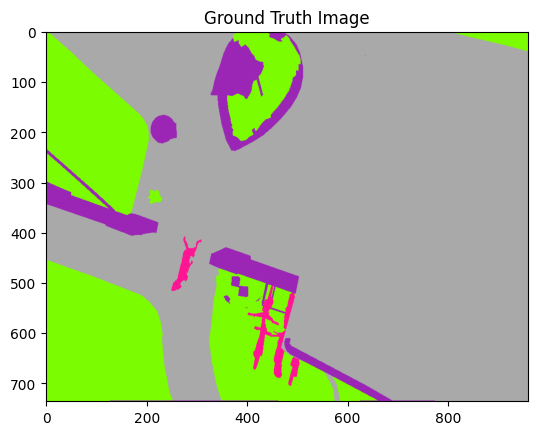

Predicted image shape: (736, 960, 3), dtype: uint8
Ground truth shape: (736, 960, 3), dtype: uint8


In [25]:
import numpy as np

def convert_classes_to_rgb(one_hot_encoded):
    # Define the updated class to RGB mapping
    CLASS_TO_COLOR = {
        0: (0, 0, 0),          # unlabeled
        1: (155, 38, 182),     # obstacles
        2: (128, 64, 128),     # paved-area
        3: (14, 135, 204),     # water
        4: (130, 76, 0),       # dirt
        5: (124, 252, 0),      # soft-surfaces
        6: (0, 102, 0),        # grass
        7: (255, 20, 147),     # moving-objects
        8: (112, 103, 87),     # gravel
        9: (169, 169, 169),    # landing-zones
        10: (28, 42, 168),     # water (duplicate)
        11: (48, 41, 30),      # rocks
        12: (0, 50, 89),       # pool
        13: (107, 142, 35),    # vegetation
        14: (70, 70, 70),      # roof
        15: (102, 102, 156),   # wall
        16: (254, 228, 12),    # window
        17: (254, 148, 12),    # door
        18: (190, 153, 153),   # fence
        19: (153, 153, 153),   # fence-pole
        20: (255, 22, 96),     # person
        21: (102, 51, 0),      # dog
        22: (9, 143, 150),     # car
        23: (119, 11, 32),     # bicycle
        24: (51, 51, 0),       # tree
        25: (190, 250, 190),   # bald-tree
        26: (112, 150, 146),   # ar-marker
        27: (2, 135, 115),     # obstacle
        28: (255, 0, 0)        # conflicting
    }

    height, width, num_classes = one_hot_encoded.shape

    # Get the class indices using argmax
    class_indices = np.argmax(one_hot_encoded, axis=-1)

    # Create an empty RGB image
    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Convert class indices to RGB values
    for i in range(height):
        for j in range(width):
            class_index = class_indices[i, j]
            rgb_image[i, j] = CLASS_TO_COLOR.get(class_index, (0, 0, 0))  # Default to black if not found

    return rgb_image


# Example usage
for k in range(10):

    sol = np.expand_dims(second_training[k],axis = 0)

    prediction = teacher_model.predict(sol)
    prediction = prediction[0]

    prediction = np.asarray(prediction)
    #now we downcast the size of the array 
    prediction = prediction.squeeze()

    print(prediction.shape)



    rgb_image = convert_classes_to_rgb(prediction)

    rgb_image1 = convert_classes_to_rgb(second_training_semantic[k])

    plt.imshow(rgb_image)
    plt.title("Predicted Image")
    plt.show()
    
    plt.imshow(rgb_image1)
    plt.title("Ground Truth Image")
    plt.show()


    print(f"Predicted image shape: {rgb_image.shape}, dtype: {rgb_image.dtype}")
    print(f"Ground truth shape: {rgb_image1.shape}, dtype: {rgb_image1.dtype}")


In [ ]:
#now lets get the predictions of teacher model 
predictions_list = []
for i in range(len(second_training)):
    l = np.expand_dims(second_training[i],axis= 0)
    print(l.shape)
    prediction = teacher_model.predict(l)
    prediction = np.asarray(prediction)
    print(prediction.shape)
    predictions_list.append(prediction[0])

predictions_list = np.asarray(predictions_list)
#now after getting the predictions , we now train the student model 
#now we will try to train the attention infused unet model with the data 
#for this we will try to use the iou and the dice score as the metrics
print(predictions_list[1].shape)

In [27]:
#now we try to save the model 
teacher_model.save("/kaggle/working/teacher_model.h5")


In [ ]:
#lets see one predeiction
l = predictions_list[2]

l  = np.squeeze(l)

plt.imshow(l)
plt.axis("off")

plt.show()

#now lets plot the model 




In [ ]:
k = denormalized_semantic_image[2]

plt.imshow(k)
plt.axis("off")

plt.show()

In [ ]:
#now lets create the student model 
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

# Now we have created the Teacher UNet model; next, we will create the Student model
class StudentNetwork(TeacherNetwork):
    def __init__(self):
        self.activation = 'relu'
        self.padding = 'same'
        self.kernel_size = (3,3)
    
    def spatial_pyramid_pooling(self, input_tensor, input_channel):
        '''
        In spatial pyramid pooling we try to take various pooled features and then we upsample them 
        to get a better representation of smaller features here we take arious scaled features 
        Here we take 4 pooled features each of different kernel size 
        in the paper they applied average pooling here we do the same 
        the function will return the pooled features upsampled concatenated with the original feature map 
        here the number of channels does not change
        '''
        average_feature1 = AveragePooling2D((1,1))(input_tensor) 
        average_feature2 = AveragePooling2D((2,2))(input_tensor)
        average_feature3 = AveragePooling2D((4,4))(input_tensor)
        average_feature4 = AveragePooling2D((8,8))(input_tensor)

        upsampled_feature2 = UpSampling2D((2,2), interpolation='nearest')(average_feature2)
        upsampled_feature3 = UpSampling2D((4,4), interpolation='nearest')(average_feature3)
        upsampled_feature4 = UpSampling2D((8,8), interpolation='nearest')(average_feature4)
        
        # Concatenating features
        output_feature = Concatenate(axis=-1)([input_tensor, upsampled_feature2, upsampled_feature3, upsampled_feature4])
        
        # Normalize channels after concatenation
        output_feature1 = Conv2D(input_channel, self.kernel_size, padding=self.padding, activation=self.activation)(output_feature)
        return output_feature1

    def build_model1(self, input_shape):
        input1 = Input(shape=input_shape)
        
        conv_layer1 = Conv2D(1, self.kernel_size, padding=self.padding, activation=self.activation)(input1)
        encoder_layer1 = super().encoder_layer(16, conv_layer1)
        encoder_layer2 = super().encoder_layer(32, encoder_layer1[1])
        encoder_layer3 = super().encoder_layer(64, encoder_layer2[1])

        spp_layer1 = self.spatial_pyramid_pooling(encoder_layer1[0], 16)
        spp_layer2 = self.spatial_pyramid_pooling(encoder_layer2[0], 32)
        spp_layer3 = self.spatial_pyramid_pooling(encoder_layer3[0], 64)

        # Decoder
        decoder_layer4 = super().decoder_layer(64, encoder_layer4[0])
        concatenate_layer = Concatenate(axis=-1)([spp_layer3, decoder_layer4])
        
        decoder_layer3 = super().decoder_layer(32, concatenate_layer)
        concatenate_layer2 = Concatenate(axis=-1)([spp_layer2, decoder_layer3])
        
        decoder_layer2 = super().decoder_layer(16, concatenate_layer2)
        concatenate_layer1 = Concatenate(axis=-1)([spp_layer1, decoder_layer2])
        
        # Final Convolution layers
        conv_1 = Conv2D(10, self.kernel_size, padding=self.padding, activation=self.activation)(concatenate_layer1)
        output_image = Conv2D(29,(1,1), padding=self.padding, activation="softmax")(conv_1)
        
        # Building model
        student_model = Model(inputs=input1, outputs=output_image)
        return student_model

In [ ]:
#now lets create an object of the student network class 
import tensorflow as tf


student_network = StudentNetwork()
student_model = student_network.build_model1((736,960,29))
student_model.summary()

In [ ]:
#now lets compile the student model 
#now we will try to train the attention infused unet model with the data 
#for this we will try to use the iou and the dice score as the metrics
from keras.optimizers import Adam 
student_model.compile(metrics = [iou_score,dice_score],optimizer= Adam(learning_rate = 0.001),loss = iou_loss)

In [ ]:
#now lets fit the data to the student model 
history = student_model.fit(second_training,predictions_list,(validation_set_original,validation_set_semantic),verbose = 1, epochs = 10, batch_size = 3)
